# Подготовка

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from matplotlib import cm

## Вспомогательные функции

In [ ]:
def miss(data):
    missing = data.isna().sum()
    mis_per = 100 * missing / len(data)
    mis_table = pd.DataFrame({"Miss count": missing, 
                              "Miss percent": mis_per}).sort_values(by = "Miss percent", ascending=False)
    return mis_table[mis_table['Miss count'] != 0]

In [ ]:
def data_notna(data, keys):
    df = data[keys]
    df = df.loc[~df.isna().any(axis=1)]
    return df

In [ ]:
def gradientbars(bars,ydata,cmap):
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    ax.axis(lim)
    for bar in bars:
        bar.set_facecolor("none")
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        grad = np.atleast_2d(np.linspace(0,1*h/max(ydata),256)).T
        #zorder of 2 to get gradients above the facecolor, but below the bar outlines
        ax.imshow(grad, extent=[x,x+w,y,y+h], origin='lower',aspect="auto",zorder=2, 
                  norm=cm.colors.NoNorm(vmin=0,vmax=1),cmap=plt.get_cmap(cmap))

## Данные

In [ ]:
flights = pd.read_csv('data/flights.csv', dtype=str)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
airlines = pd.read_csv('data/airlines.csv', dtype=str)
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [ ]:
airports = pd.read_csv('data/airports.csv', dtype=str)
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
miss(flights)

,Miss count,Miss percent
CANCELLATION_REASON,5729195,98.455357
WEATHER_DELAY,4755640,81.724960
LATE_AIRCRAFT_DELAY,4755640,81.724960
AIRLINE_DELAY,4755640,81.724960
SECURITY_DELAY,4755640,81.724960
AIR_SYSTEM_DELAY,4755640,81.724960
AIR_TIME,105071,1.805629
ARRIVAL_DELAY,105071,1.805629
ELAPSED_TIME,105071,1.805629
WHEELS_ON,92513,1.589822


# Отчет

## Задержка относительно дней недели
Изучим вопрос:  
Каковы средние задержки для дней недели.

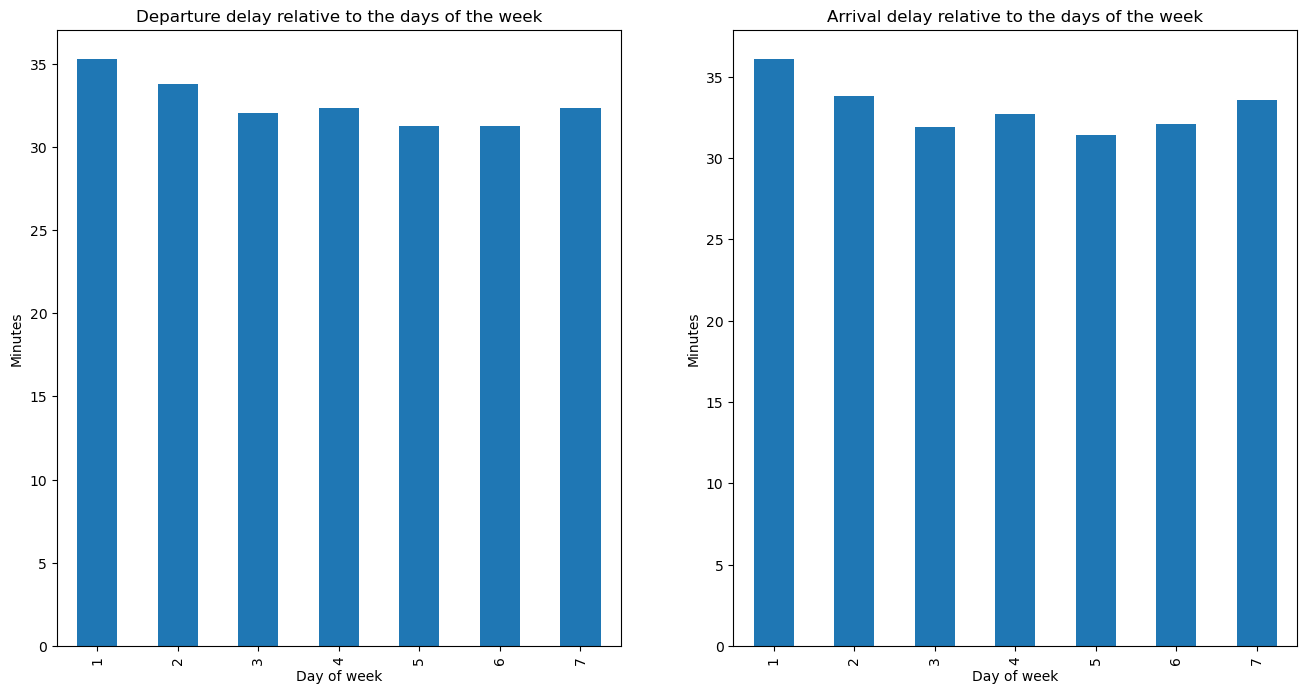

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

columns = ['DEPARTURE_DELAY', 'DAY_OF_WEEK']
df = data_notna(flights, columns).astype(int)
df = df[df['DEPARTURE_DELAY'] > 0]
df = df.groupby('DAY_OF_WEEK').mean()
df.plot(kind='bar', xlabel='Day of week', ylabel='Minutes',legend=False, ax=ax1,
        title='Departure delay relative to the days of the week')

columns = ['ARRIVAL_DELAY', 'DAY_OF_WEEK']
df = data_notna(flights, columns).astype(int)
df = df[df['ARRIVAL_DELAY'] > 0]
df = df.groupby('DAY_OF_WEEK').mean()
df.plot(kind='bar', xlabel='Day of week',ylabel='Minutes', legend=False, ax=ax2,
        title='Arrival delay relative to the days of the week')

plt.show()

Из графиков видно, что в среднем самые длительные задержки (как по отправлению, так и по прибытию) приходятся на Понедельник. 

## Задержка относительно месяцев
Изучим вопрос:  
Каковы средние задержки для разных месяцев.

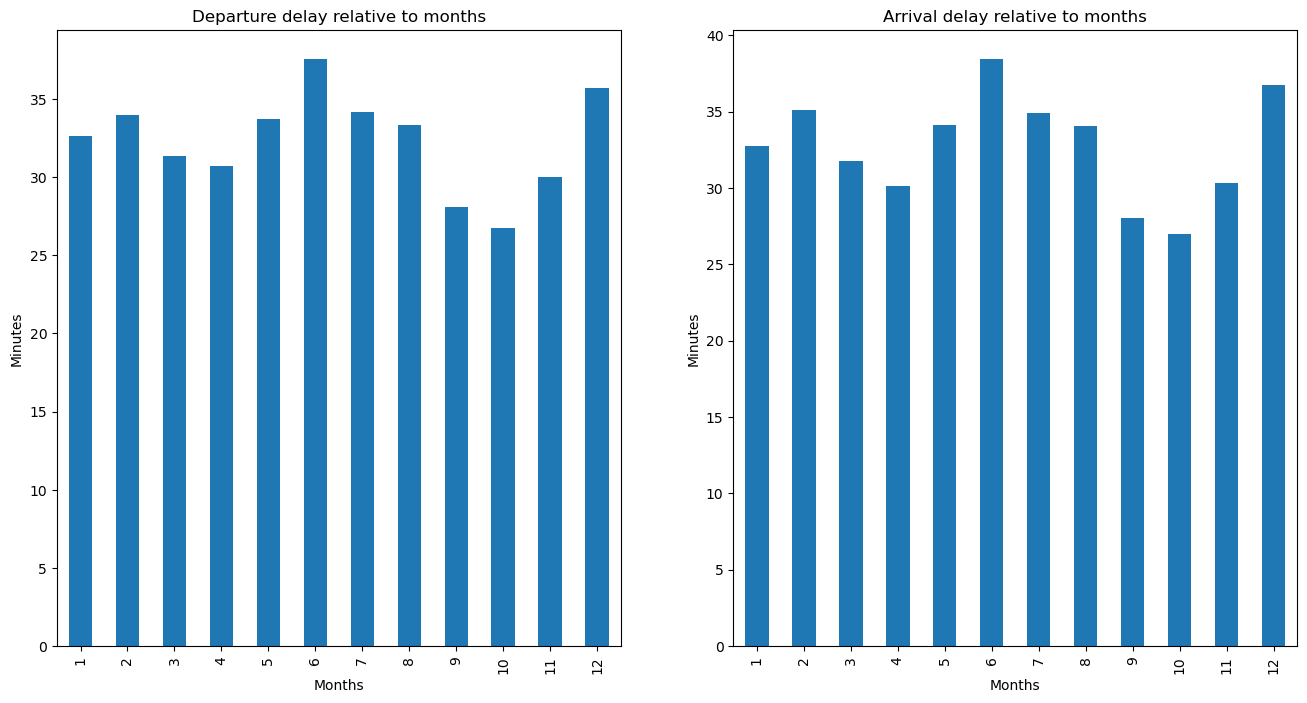

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))


columns = ['DEPARTURE_DELAY', 'MONTH']
df = data_notna(flights, columns).astype(int)
df = df[df['DEPARTURE_DELAY'] > 0]
df = df.groupby('MONTH').mean()
df.plot(kind='bar', xlabel='Months', ylabel='Minutes', ax=ax1, legend=False,
                                title='Departure delay relative to months')

columns = ['ARRIVAL_DELAY', 'MONTH']
df = data_notna(flights, columns).astype(int)
df = df[df['ARRIVAL_DELAY'] > 0]
df = df.groupby('MONTH').mean()
df.plot(kind='bar', xlabel='Months', ylabel='Minutes', ax=ax2, legend=False,
                                title='Arrival delay relative to months')

plt.show()

Из графиков видно, что в срежнем самые большие задержки приходятся на шестой месяц, то есть на июнь, также не сильно отстает и декабрь.  
Вероятно это свзязано с тем, что в данные месяцы - множество людей берут отпуск, а значит большей рейсов, чем вдругое время года.  

## Задержки относительно времени суток
Изучим вопрос:   
Каковы средние задержки для разного времени суток.

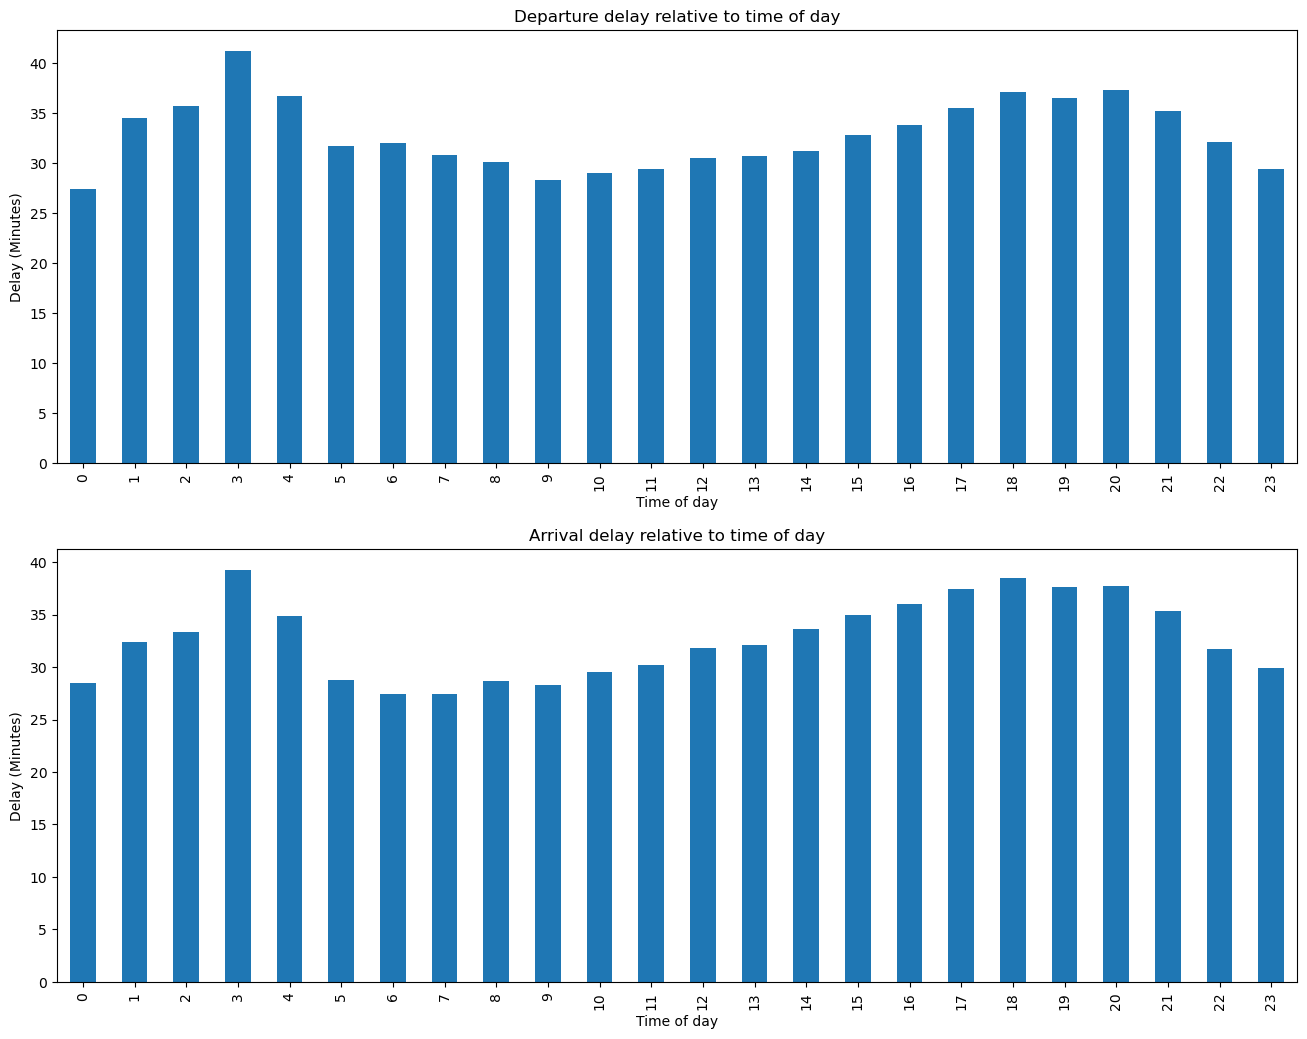

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
plt.subplots_adjust(top=1.3)

columns = ['DEPARTURE_DELAY', 'SCHEDULED_DEPARTURE']
df = data_notna(flights, columns)
df['HOUR'] = df['SCHEDULED_DEPARTURE'].apply(lambda time: time[:2])
df = df.drop(columns=['SCHEDULED_DEPARTURE']).astype(int)
df = df[df['DEPARTURE_DELAY'] > 0]
df.groupby('HOUR').mean().plot(kind='bar', xlabel='Time of day', ylabel='Delay (Minutes)', ax=ax1, legend=False,
                               title='Departure delay relative to time of day')


columns = ['ARRIVAL_DELAY', 'SCHEDULED_DEPARTURE']
df = data_notna(flights, columns)
df['HOUR'] = df['SCHEDULED_DEPARTURE'].apply(lambda time: time[:2])
df = df.drop(columns=['SCHEDULED_DEPARTURE']).astype(int)
df = df[df['ARRIVAL_DELAY'] > 0]
df.groupby('HOUR').mean().plot(kind='bar', xlabel='Time of day', ylabel='Delay (Minutes)', ax=ax2, legend=False,
                               title='Arrival delay relative to time of day')

plt.show()

Из графиков видим, что на рейсы как прибывающие, так и отбывающие в 3 часа ночи, самые долгие задержки. Так же стоит отметить и вечернее время (18 - 20 часов).

## Задержки относительно дистанции полета
Изучим вопрос:   
Каковы средние задержки для разных дистанций перелетов.

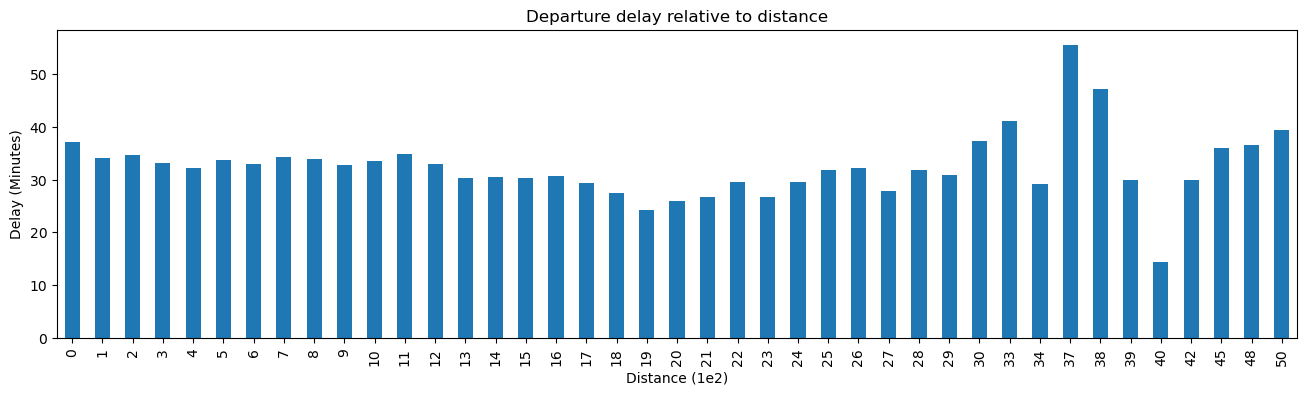

In [ ]:
columns = ['DEPARTURE_DELAY', 'DISTANCE']
df = data_notna(flights, columns).astype(int)

df = df[df['DEPARTURE_DELAY'] > 0]
df['DISTANCE'] = round(df['DISTANCE'] / 100).astype(int)
df = df.groupby('DISTANCE').mean()

df.plot(kind='bar', xlabel='Distance (1e2)', ylabel='Delay (Minutes)', legend=False, figsize=(16, 4),
        title='Departure delay relative to distance')
plt.show()

Как видно из графика, самые большие задержки приходятся на рейсы дистанции 3700-3800 миль.

## Задержки относительно аэропортов
Изучим вопрос:  
Каковы средние задержки для разных аэропортов.

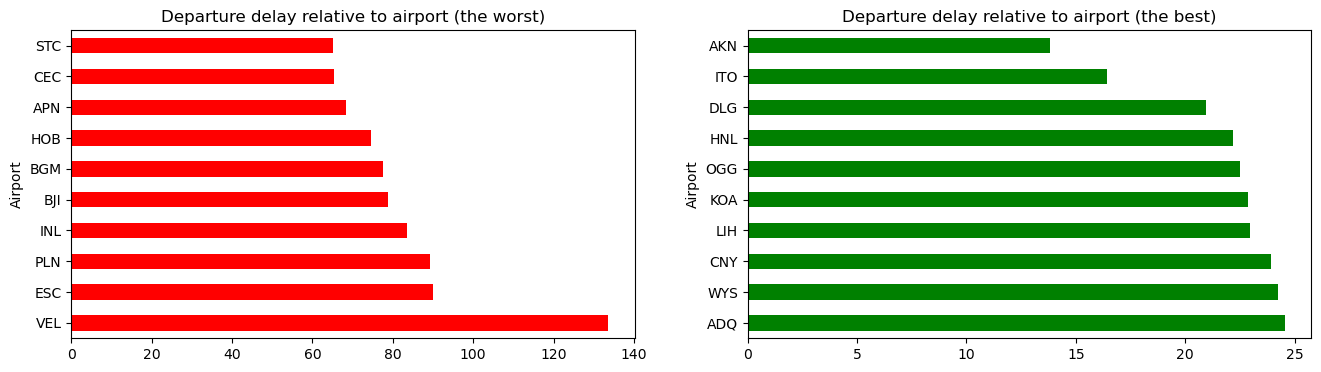

In [ ]:
columns = ['DEPARTURE_DELAY', 'ORIGIN_AIRPORT']
df = data_notna(flights, columns)
df['DEPARTURE_DELAY'] = df['DEPARTURE_DELAY'].astype(int)

df = df[df['DEPARTURE_DELAY'] > 0]
df['isAirport'] = df['ORIGIN_AIRPORT'].apply(len) <= 3
df = df[df['isAirport']].drop(columns=['isAirport'])
df = df.groupby('ORIGIN_AIRPORT').mean().sort_values(by='DEPARTURE_DELAY', ascending=False)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
df.head(10).plot(kind='barh', xlabel='Airport', ylabel='Delay (Minutes)', legend=False, ax =ax1, color='red',
                 title='Departure delay relative to airport (the worst)')
df.tail(10).plot(kind='barh', xlabel='Airport', ylabel='Delay (Minutes)', legend=False, ax =ax2, color='green',
                 title='Departure delay relative to airport (the best)')
plt.show()

In [ ]:
worst_airports = df.index.tolist()
airports[airports['IATA_CODE'].isin(worst_airports[:1])]

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
314,VEL,Valdez Airport,Vernal,UT,USA,40.44090,-109.50992


Как видим из графиков среднаяя задержка в некоторых аэропортах достигает почти 140 минут (Valdez Airport).

 ## Причины задержки рейса в Valdez Airport
 Изучим причны длительных задержек в Valdez Airport. 

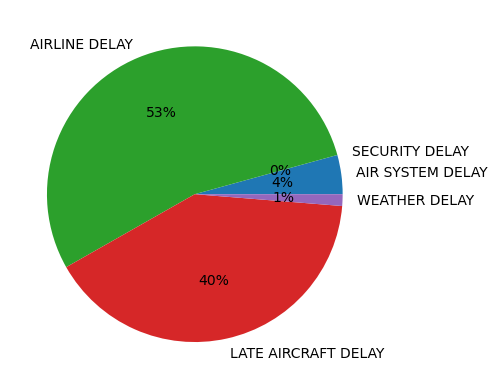

In [ ]:
columns = ['ORIGIN_AIRPORT', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 
           'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df = data_notna(flights, columns)
df = df[df['ORIGIN_AIRPORT'] == 'VEL'].drop(columns=['ORIGIN_AIRPORT']).astype(int)

plt.pie(df.sum(), labels=[name.replace('_', ' ') for name in columns[1:]], autopct='%1.d%%')
plt.show()

Как видим из графика, в общей сумме большая длительность задержки связана с авиакомпниями и с обслуживанием воздушного судна.

## Причины задержки рейсов
Взглянем, какие причины в принципе влияют на задержку.

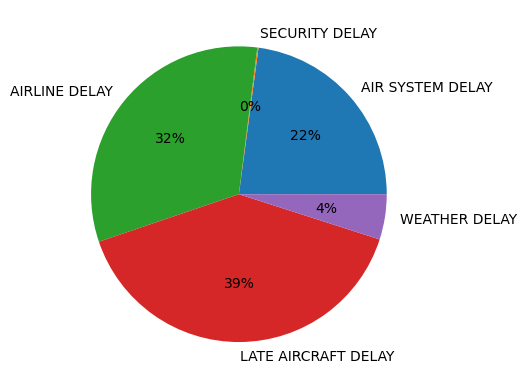

In [ ]:
columns = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 
           'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df = data_notna(flights, columns).astype(int)

plt.pie(df.sum(), labels=[name.replace('_', ' ') for name in columns], autopct='%1.d%%')
plt.show()

Как видим, на первом месте - обслуживание самолёта, на втором - задержка авиакомпании, на третьем - задержки связанные с воздушной системой.

## Задержки относительно авакомпаний
В предыдущем пункте было выяснено, что авиакомпании вносят немаленький вклад в задержку рейса. Изучим вопрос: у каких авиакомпаниий наибольшие проблемы с задержкой.

<AxesSubplot: title={'center': 'Departure delay relative to airlines'}, xlabel='Airline', ylabel='Delay (Minutes)'>

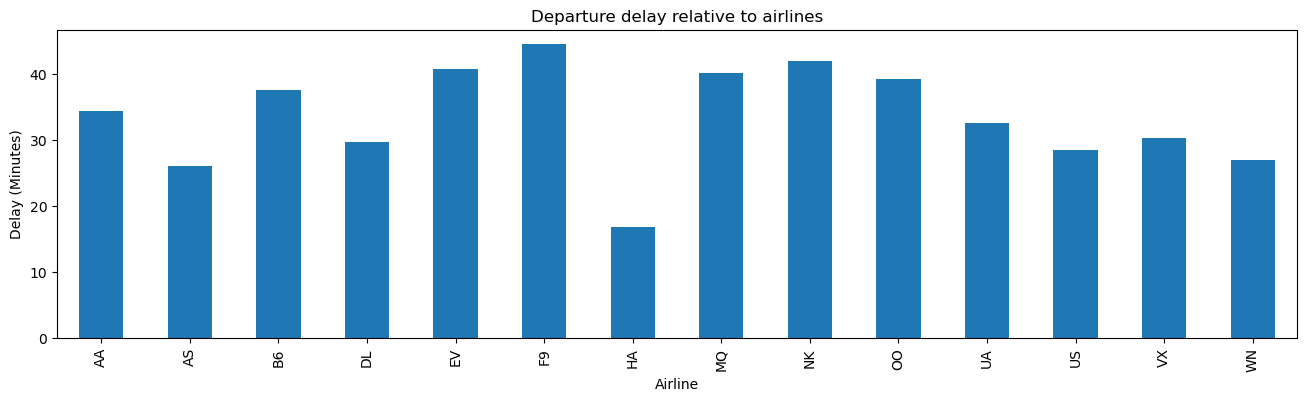

In [ ]:
columns = ['DEPARTURE_DELAY', 'AIRLINE']
df = data_notna(flights, columns)

df['DEPARTURE_DELAY'] = df['DEPARTURE_DELAY'].astype(int)
df = df[df['DEPARTURE_DELAY'] > 0]
df = df.groupby('AIRLINE').mean()

df.plot(kind='bar', xlabel='Airline', ylabel='Delay (Minutes)', legend=False, figsize=(16, 4),
        title='Departure delay relative to airlines')

In [ ]:
df_ = df.sort_values(by='DEPARTURE_DELAY', ascending=False)
airlines[airlines['IATA_CODE'].isin(df_.head(3).index.tolist())]

,IATA_CODE,AIRLINE
3,F9,Frontier Airlines Inc.
7,NK,Spirit Air Lines
10,EV,Atlantic Southeast Airlines


Как видно из графика в среднем самые большие задержки (около 40 минут) у авакомпаний: Frontier Airlines Inc., Spirit Air Lines, Atlantic Southeast Airlines.

## Задержки относительно штатов
Изучим вопрос:  
В каких штатах самые большие задержки.

<AxesSubplot: title={'center': 'Departure delay relative to states'}, xlabel='State', ylabel='Delay (Minutes)'>

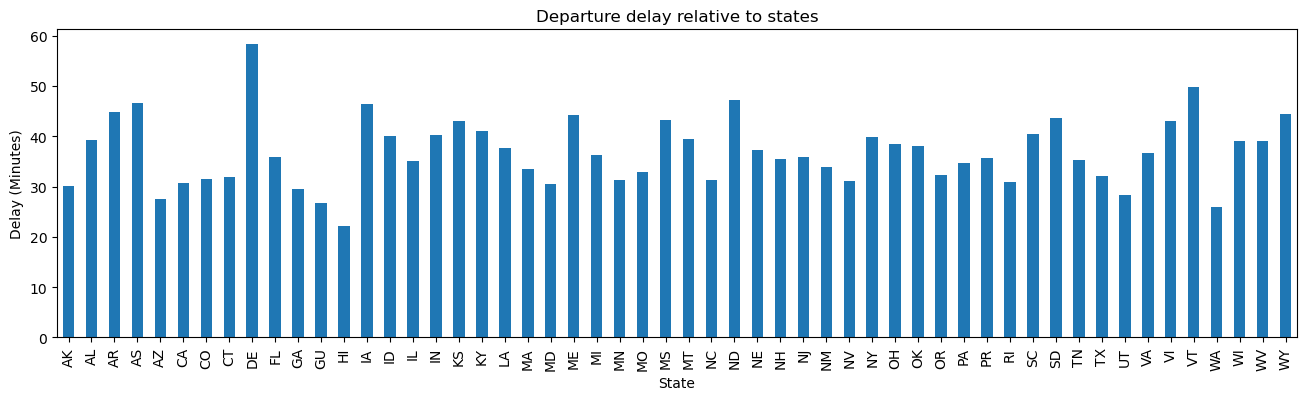

In [ ]:
columns = ['DEPARTURE_DELAY', 'ORIGIN_AIRPORT']
df = data_notna(flights, columns)
df['DEPARTURE_DELAY'] = df['DEPARTURE_DELAY'].astype(int)

df = df[df['DEPARTURE_DELAY'] > 0]
df['isAirport'] = df['ORIGIN_AIRPORT'].apply(len) <= 3
df = df[df['isAirport']].drop(columns=['isAirport'])
df = df.merge(airports[['IATA_CODE', 'STATE']], left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='left')
df = df.drop(columns=['IATA_CODE', 'ORIGIN_AIRPORT'])
df = df.groupby('STATE').mean().sort_values(by='STATE')

df.plot(kind='bar', xlabel='State', ylabel='Delay (Minutes)', legend=False, figsize=(16, 4),
        title='Departure delay relative to states')

Из графика видно, что первое место по задержкам занимает штата Делавэр (DE).

## Причины задержек в штате Делавэр
Ознакомимся с причинами задержек в штате Делавэр.

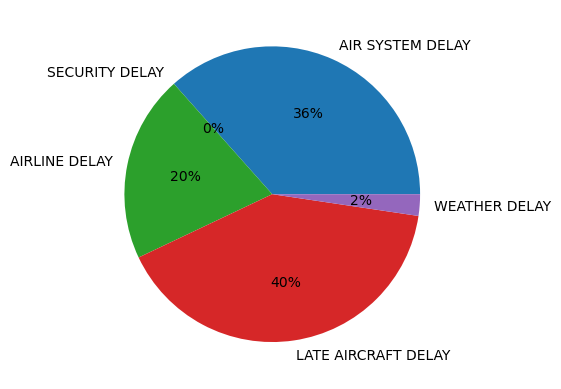

In [ ]:
columns = ['ORIGIN_AIRPORT', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 
           'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df = data_notna(flights, columns)

df['isAirport'] = df['ORIGIN_AIRPORT'].apply(len) <= 3
df = df[df['isAirport']].drop(columns=['isAirport'])

df = df.merge(airports[['IATA_CODE', 'STATE']], left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='left')
df = df.drop(columns=['IATA_CODE', 'ORIGIN_AIRPORT'])
df = df[df['STATE'] == 'DE'].drop(columns=['STATE']).astype(int)

plt.pie(df.sum(), labels=[name.replace('_', ' ') for name in columns[1:]], autopct='%1.d%%')
plt.show()

Видим, что в данном штате большая чась задержек пиходится на обслуживание воздушного судна, так же задержки, связанные с воздушной системой и авиакомпаниями вносят немалый вклад.